In [14]:
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import torch
import random
import torch.nn as nn
import torch.optim as optim
warnings.filterwarnings('ignore')

In [15]:
data_path = './dataset'
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(device)
cross = 20

cuda:1


Begin to process person huangsiye_20210529_1.
Acc of train set: 0.89968
Acc of test set: 0.90184
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91359
Acc of test set: 0.91772
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87096
Acc of test set: 0.87808
Begin to process person liangjie_20210424_2.
Acc of train set: 0.73058
Acc of test set: 0.75202
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.76605
Acc of test set: 0.73555
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.82067
Acc of test set: 0.80465
Begin to process person tana_20210425_1.
Acc of train set: 0.92833
Acc of test set: 0.92080
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.77602
Acc of test set: 0.76609
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.83942
Acc of test set: 0.83439
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.80899
Acc of test set: 0.81043
Begin to process person zhengwen

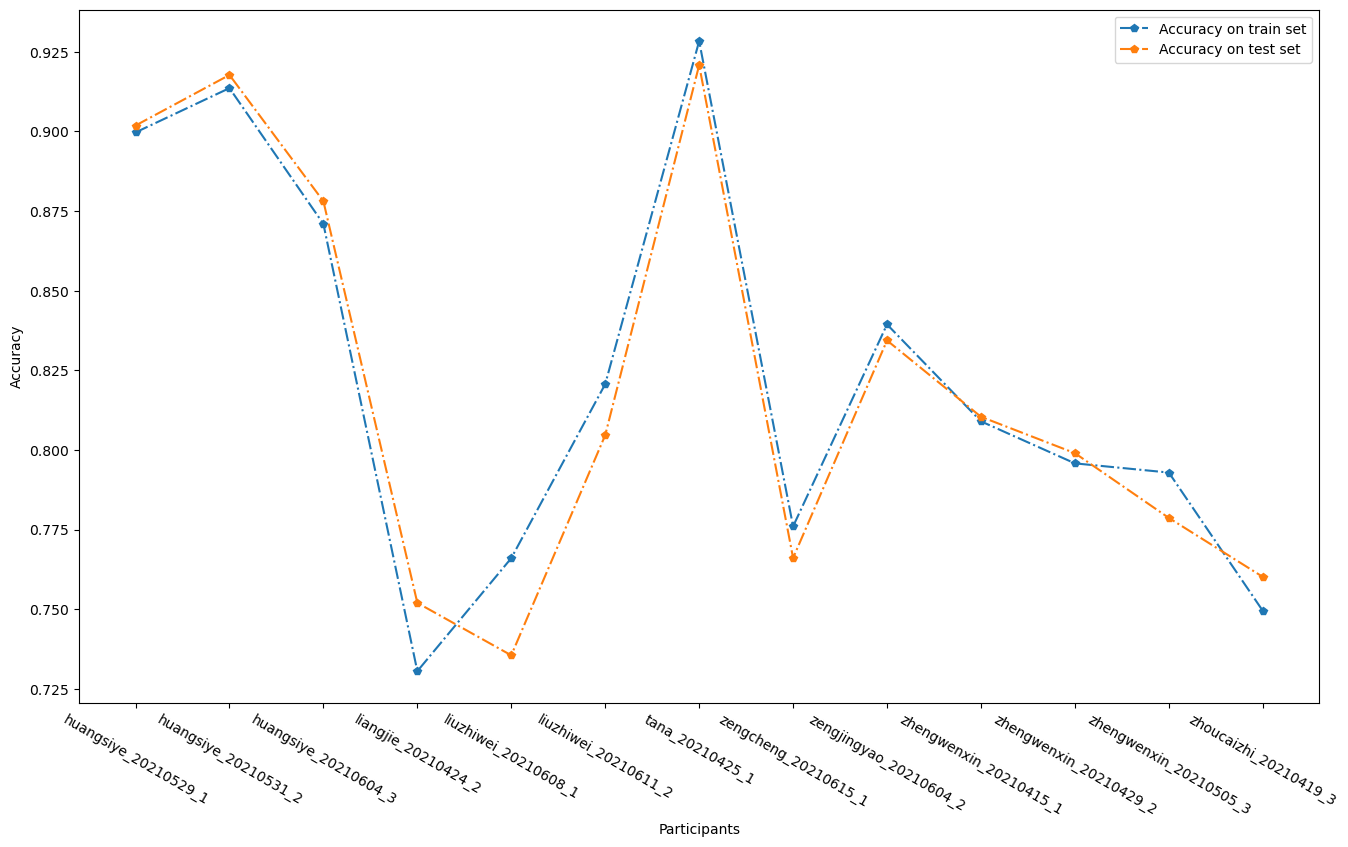

In [16]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_SVM = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label, test_data, test_label = traindata[:,:-1], traindata[:,-1], testdata[:,:-1], testdata[:,-1]
        classifier = svm.SVC(C=1,kernel='rbf')
        classifier.fit(train_data, train_label)
        trains.append(classifier.score(train_data, train_label))
        tests.append(classifier.score(test_data, test_label))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_SVM.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_SVM, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

Begin to process person huangsiye_20210529_1.
Acc of train set: 0.89396
Acc of test set: 0.90046
Begin to process person huangsiye_20210531_2.


Acc of train set: 0.91356
Acc of test set: 0.91928
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87276
Acc of test set: 0.87634
Begin to process person liangjie_20210424_2.
Acc of train set: 0.73123
Acc of test set: 0.74786
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.75863
Acc of test set: 0.75214
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.82183
Acc of test set: 0.80543
Begin to process person tana_20210425_1.
Acc of train set: 0.92680
Acc of test set: 0.92587
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.77217
Acc of test set: 0.76601
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.83278
Acc of test set: 0.84017
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.80440
Acc of test set: 0.81454
Begin to process person zhengwenxin_20210429_2.
Acc of train set: 0.79431
Acc of test set: 0.80293
Begin to process person zhengwenxin_20210505_3.
Acc of train set: 0.79086
Ac

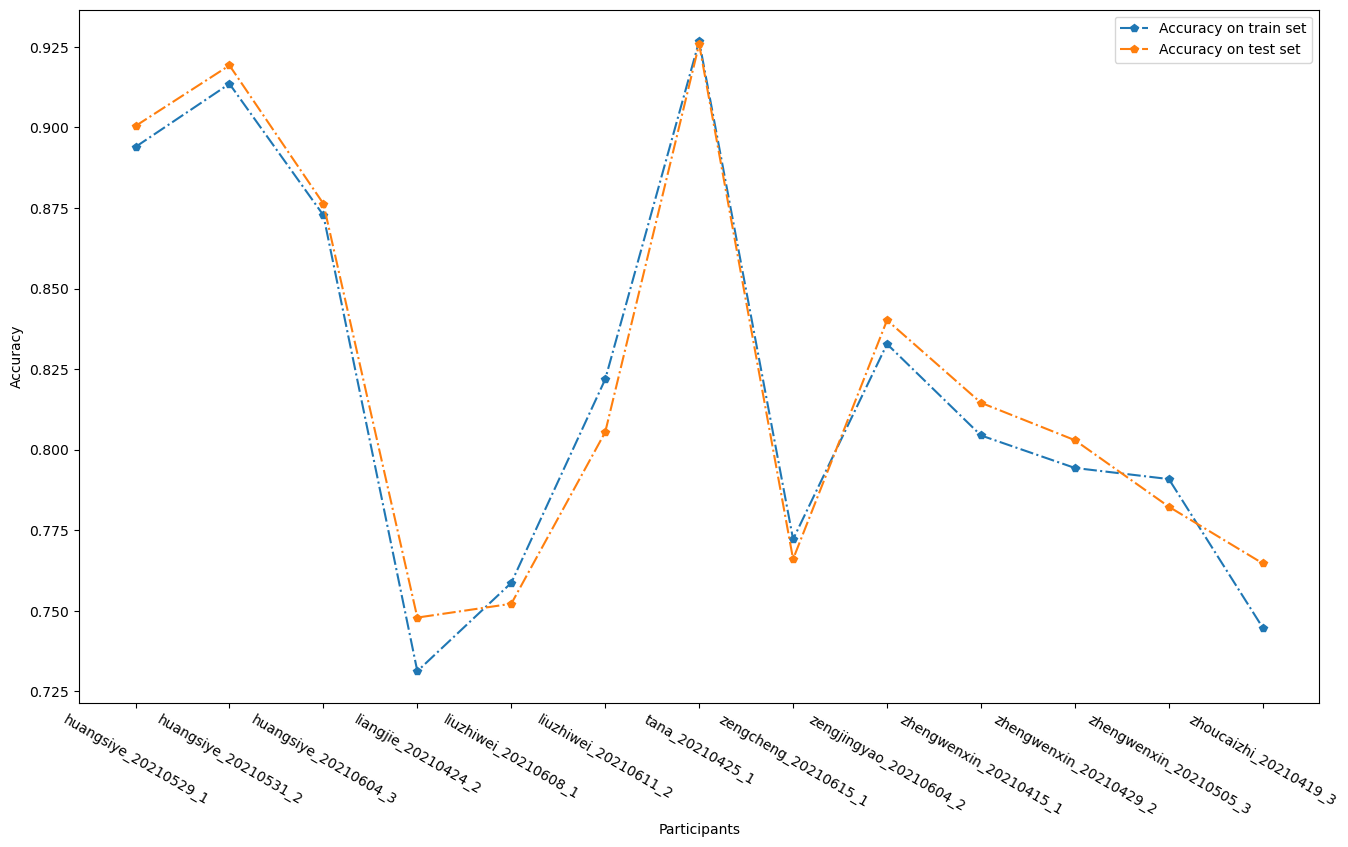

In [17]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_LR = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label, test_data, test_label = traindata[:,:-1], traindata[:,-1], testdata[:,:-1], testdata[:,-1]
        classifier = LogisticRegression(penalty="l1", C=0.5, solver="liblinear")
        classifier.fit(train_data, train_label)
        trains.append(classifier.score(train_data, train_label))
        tests.append(classifier.score(test_data, test_label))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_LR.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_LR, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

Begin to process person huangsiye_20210529_1.


Acc of train set: 0.93060
Acc of test set: 0.87549
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.95820
Acc of test set: 0.88406
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.88096
Acc of test set: 0.86489
Begin to process person liangjie_20210424_2.
Acc of train set: 0.77420
Acc of test set: 0.72727
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.83477
Acc of test set: 0.71465
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.88529
Acc of test set: 0.76250
Begin to process person tana_20210425_1.
Acc of train set: 0.98532
Acc of test set: 0.86586
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.80943
Acc of test set: 0.75902
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.85637
Acc of test set: 0.80853
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.85472
Acc of test set: 0.76109
Begin to process person zhengwenxin_20210429_2.
Acc of train set: 0.85122
Acc 

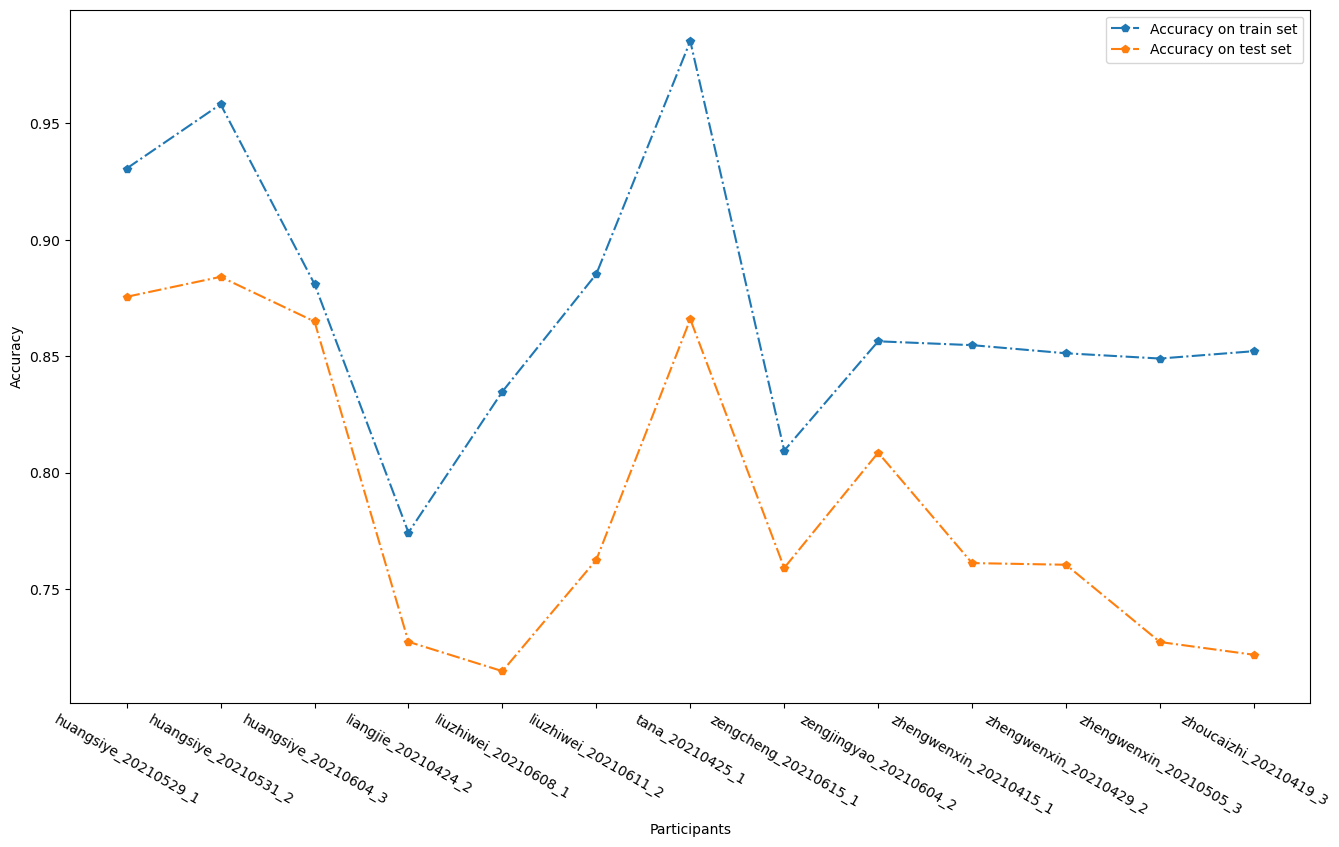

In [18]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_DTC = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label, test_data, test_label = traindata[:,:-1], traindata[:,-1], testdata[:,:-1], testdata[:,-1]
        classifier = DecisionTreeClassifier(criterion = 'entropy')
        classifier.fit(train_data, train_label)
        trains.append(classifier.score(train_data, train_label))
        tests.append(classifier.score(test_data, test_label))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_DTC.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_DTC, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

In [19]:
class MLP(nn.Module):
    def __init__(self, num_classes=2):
        super(MLP, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(310, 2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.Linear(2048, num_classes)
        )

    def forward(self, x):
        x = self.classifier(x)
        return x

In [20]:
def Validation(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

Begin to process person huangsiye_20210529_1.


Acc of train set: 0.89612
Acc of test set: 0.89558
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91261
Acc of test set: 0.92132
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87307
Acc of test set: 0.87018
Begin to process person liangjie_20210424_2.
Acc of train set: 0.73642
Acc of test set: 0.73312
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.75561
Acc of test set: 0.74842
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.81867
Acc of test set: 0.80959
Begin to process person tana_20210425_1.
Acc of train set: 0.92652
Acc of test set: 0.92643
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.77014
Acc of test set: 0.77052
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.83888
Acc of test set: 0.82835
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.80489
Acc of test set: 0.81243
Begin to process person zhengwenxin_20210429_2.
Acc of train set: 0.79694
Acc 

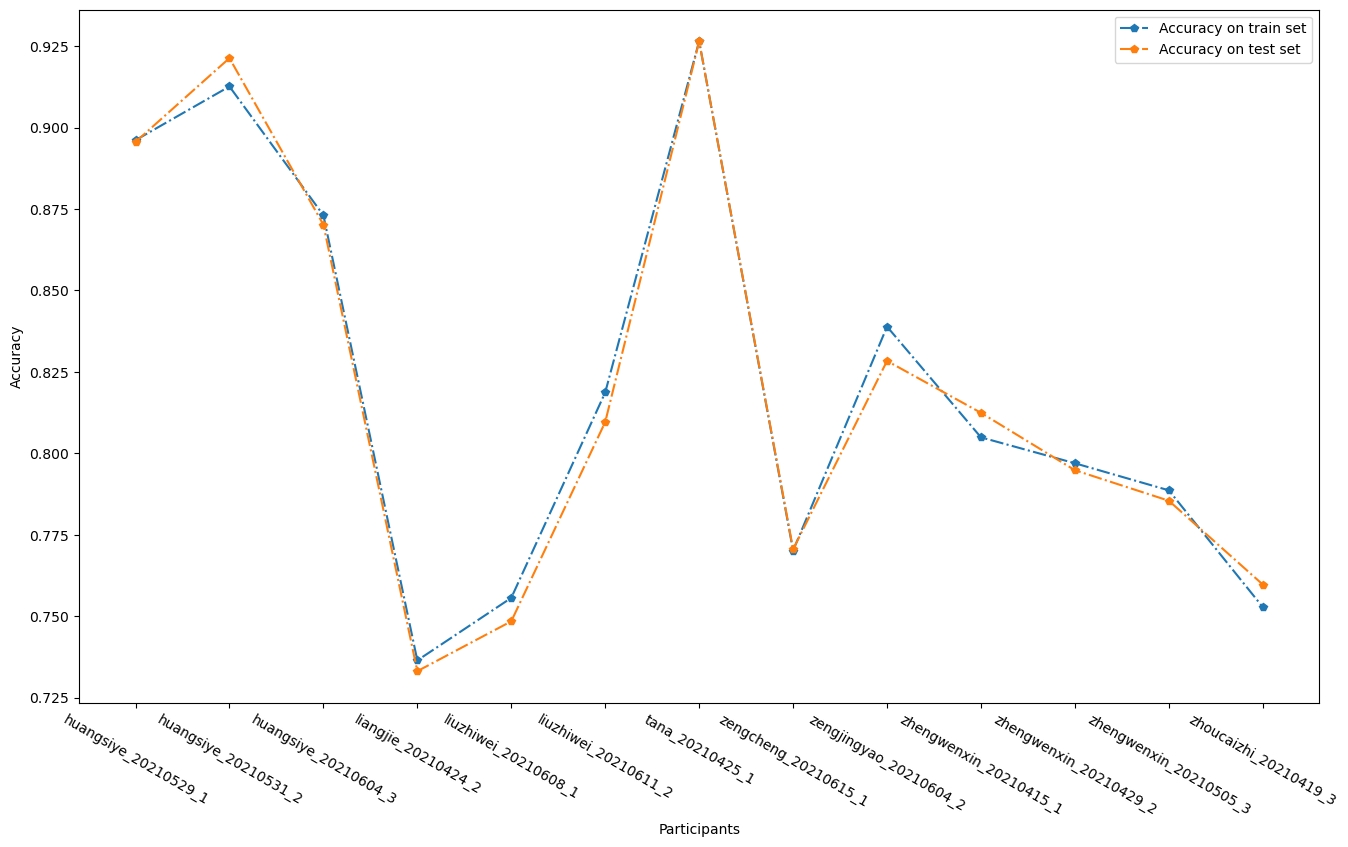

In [21]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_MLP = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = torch.from_numpy(traindata[:,:-1]).float(), torch.from_numpy(traindata[:,-1])
        test_data, test_label = torch.from_numpy(testdata[:,:-1]).float(), torch.from_numpy(testdata[:,-1])
        train_set = torch.utils.data.TensorDataset(train_data, train_label)
        test_set = torch.utils.data.TensorDataset(test_data, test_label)
        train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=False, drop_last=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False, drop_last=False)
        net = MLP().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.8))
        epoches = 15
        for epoch in range(epoches): 
            if epoch > 10:
                optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.8))
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data[0].to(device), data[1].to(device)
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
                # print("Train Epoch: {} of {} [{} of {}] Loss: {:.5f}".format(epoch+1, epoches, i+1, len(train_loader), loss.item()))
        trains.append(Validation(net=net, testloader=train_loader))
        tests.append(Validation(net=net, testloader=test_loader))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_MLP.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_MLP, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

In [22]:
class CNN(nn.Module):
    def __init__(self, num_classes = 2):
        super(CNN, self).__init__()
        # self.feature_extraction = nn.Sequential(
        #     nn.Conv1d(in_channels = 1, out_channels = 2, kernel_size = 16, padding = 1),
        #     nn.MaxPool1d(kernel_size = 8, stride = 1),
        #     nn.ReLU(),
        #     nn.Conv1d(in_channels = 2, out_channels = 2, kernel_size = 16),
        #     nn.Conv1d(in_channels = 2, out_channels = 4, kernel_size = 16, padding = 1),
        #     nn.ReLU()
        # )  
        # self.classifier = nn.Sequential(
        #     nn.Linear(1048, 2048),
        #     nn.ReLU(),
        #     nn.Dropout(),
        #     nn.Linear(2048, num_classes)
        # )
        self.feature_extraction = nn.Sequential(
            nn.Conv1d(in_channels = 5, out_channels = 8, kernel_size = 4, padding = 1),
            nn.MaxPool1d(kernel_size = 4, stride = 1),
            nn.ReLU(),
            nn.Conv1d(in_channels = 8, out_channels = 16, kernel_size = 4),
            nn.Conv1d(in_channels = 16, out_channels = 32, kernel_size = 4, padding = 1),
            nn.ReLU()
        )  
        self.classifier = nn.Sequential(
            nn.Linear(1728, 2048),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(2048, num_classes)
        )
    
    def forward(self, x):
        x = self.feature_extraction(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

Begin to process person huangsiye_20210529_1.


Acc of train set: 0.89833
Acc of test set: 0.89187
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91664
Acc of test set: 0.91333
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87327
Acc of test set: 0.87569
Begin to process person liangjie_20210424_2.
Acc of train set: 0.73729
Acc of test set: 0.73507
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.76004
Acc of test set: 0.74677
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.81362
Acc of test set: 0.81970
Begin to process person tana_20210425_1.
Acc of train set: 0.92348
Acc of test set: 0.93173
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.76991
Acc of test set: 0.77329
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.82861
Acc of test set: 0.85166
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.81126
Acc of test set: 0.79567
Begin to process person zhengwenxin_20210429_2.
Acc of train set: 0.79957
Acc 

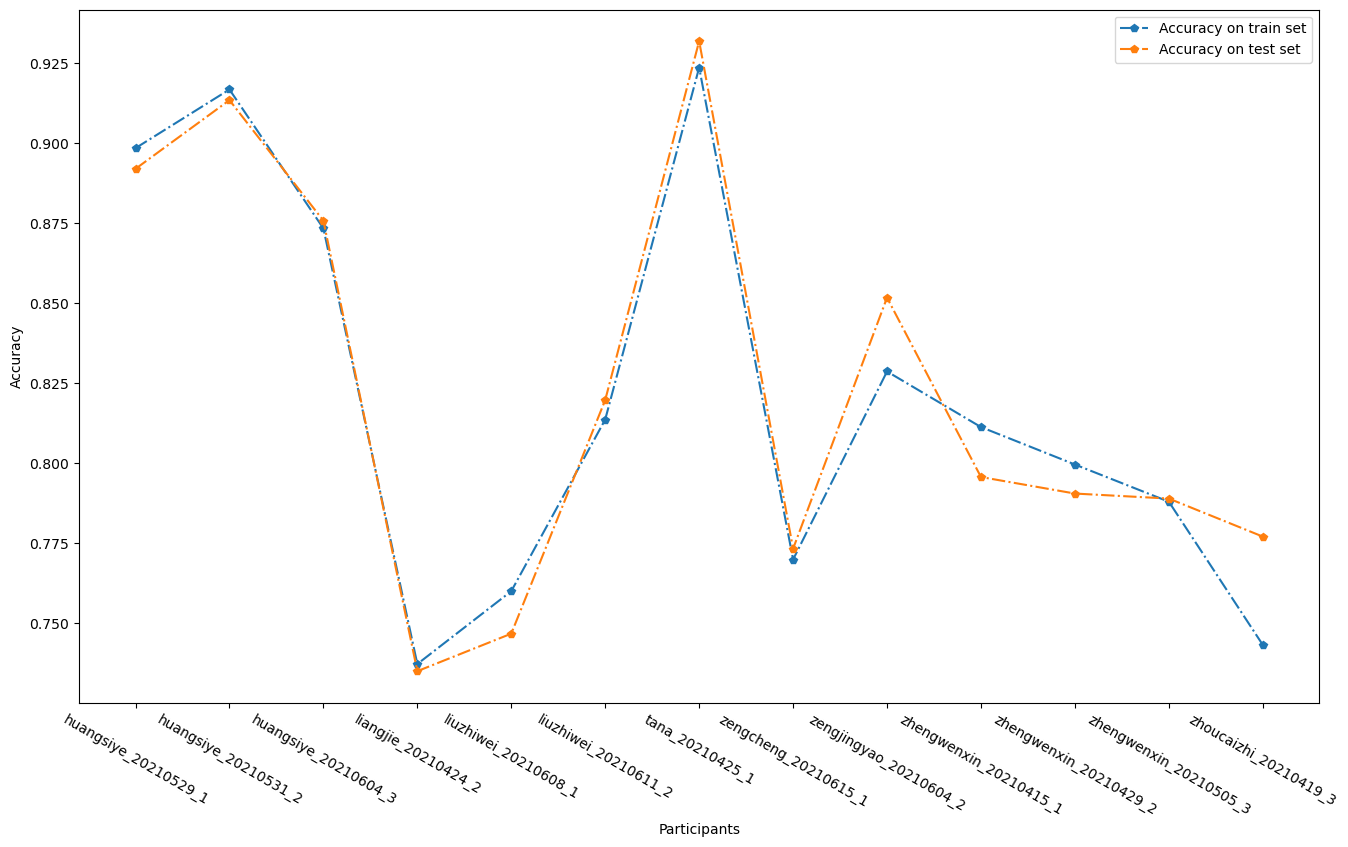

In [23]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_CNN = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = torch.from_numpy(traindata[:,:-1]).float(), torch.from_numpy(traindata[:,-1])
        test_data, test_label = torch.from_numpy(testdata[:,:-1]).float(), torch.from_numpy(testdata[:,-1])
        train_data = train_data.reshape(train_data.shape[0], 62, 5).permute(0, 2, 1)
        test_data = test_data.reshape(test_data.shape[0], 62, 5).permute(0, 2, 1)
        # train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1).permute(0, 2, 1)
        # test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], 1).permute(0, 2, 1)
        train_set = torch.utils.data.TensorDataset(train_data, train_label)
        test_set = torch.utils.data.TensorDataset(test_data, test_label)
        train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=False, drop_last=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False, drop_last=False)
        net = CNN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.8))
        epoches = 15
        for epoch in range(epoches): 
            if epoch > 10:
                optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.8))
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data[0].to(device), data[1].to(device)
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
                # print("Train Epoch: {} of {} [{} of {}] Loss: {:.5f}".format(epoch+1, epoches, i+1, len(train_loader), loss.item()))
        trains.append(Validation(net=net, testloader=train_loader))
        tests.append(Validation(net=net, testloader=test_loader))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_CNN.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_CNN, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

In [24]:
class RNN(nn.Module):
    def __init__(self, hidden_size = 32, num_classes = 2):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size = 5, hidden_size = self.hidden_size, num_layers = 2, batch_first = True, bidirectional = True)
        self.classifier = nn.Sequential(
            nn.Linear(62 * self.hidden_size * 2, 2048),
            nn.ReLU(),
            nn.Linear(2048, num_classes)
        )
    
    def forward(self, x):
        x, _ = self.rnn(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

Begin to process person huangsiye_20210529_1.


Acc of train set: 0.89691
Acc of test set: 0.89428
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91616
Acc of test set: 0.91346
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87210
Acc of test set: 0.87572
Begin to process person liangjie_20210424_2.
Acc of train set: 0.72009
Acc of test set: 0.77262
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.75592
Acc of test set: 0.75159
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.81439
Acc of test set: 0.82303
Begin to process person tana_20210425_1.
Acc of train set: 0.92745
Acc of test set: 0.92430
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.77111
Acc of test set: 0.76821
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.82993
Acc of test set: 0.84831
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.80116
Acc of test set: 0.82402
Begin to process person zhengwenxin_20210429_2.
Acc of train set: 0.79572
Acc 

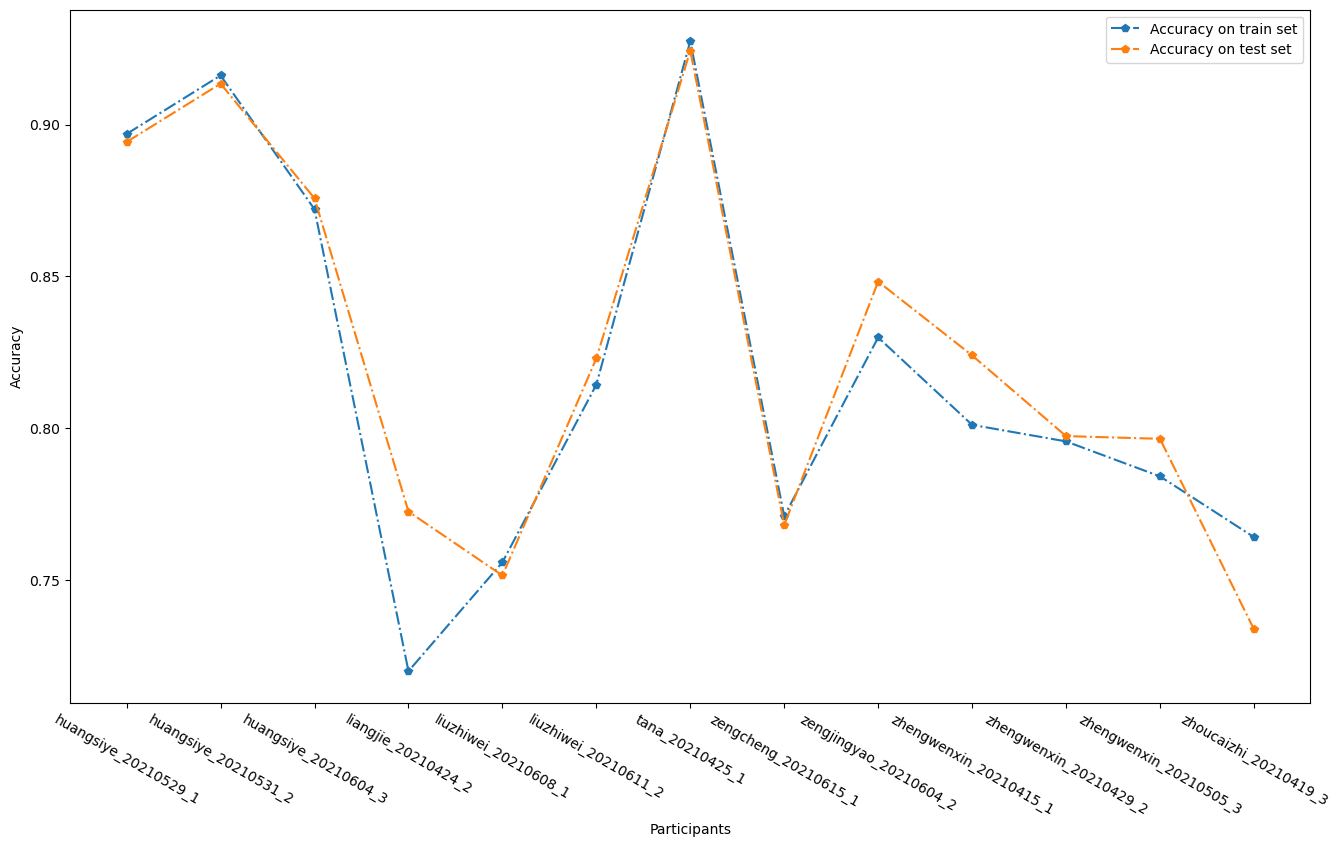

In [25]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_RNN = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = torch.from_numpy(traindata[:,:-1]).float(), torch.from_numpy(traindata[:,-1])
        test_data, test_label = torch.from_numpy(testdata[:,:-1]).float(), torch.from_numpy(testdata[:,-1])
        train_data = train_data.reshape(train_data.shape[0], 62, 5)
        test_data = test_data.reshape(test_data.shape[0], 62, 5)
        train_set = torch.utils.data.TensorDataset(train_data, train_label)
        test_set = torch.utils.data.TensorDataset(test_data, test_label)
        train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=False, drop_last=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False, drop_last=False)
        net = RNN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.8))
        epoches = 15
        for epoch in range(epoches): 
            if epoch > 10:
                optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.8))
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data[0].to(device), data[1].to(device)
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
                # print("Train Epoch: {} of {} [{} of {}] Loss: {:.5f}".format(epoch+1, epoches, i+1, len(train_loader), loss.item()))
        trains.append(Validation(net=net, testloader=train_loader))
        tests.append(Validation(net=net, testloader=test_loader))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_RNN.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_RNN, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

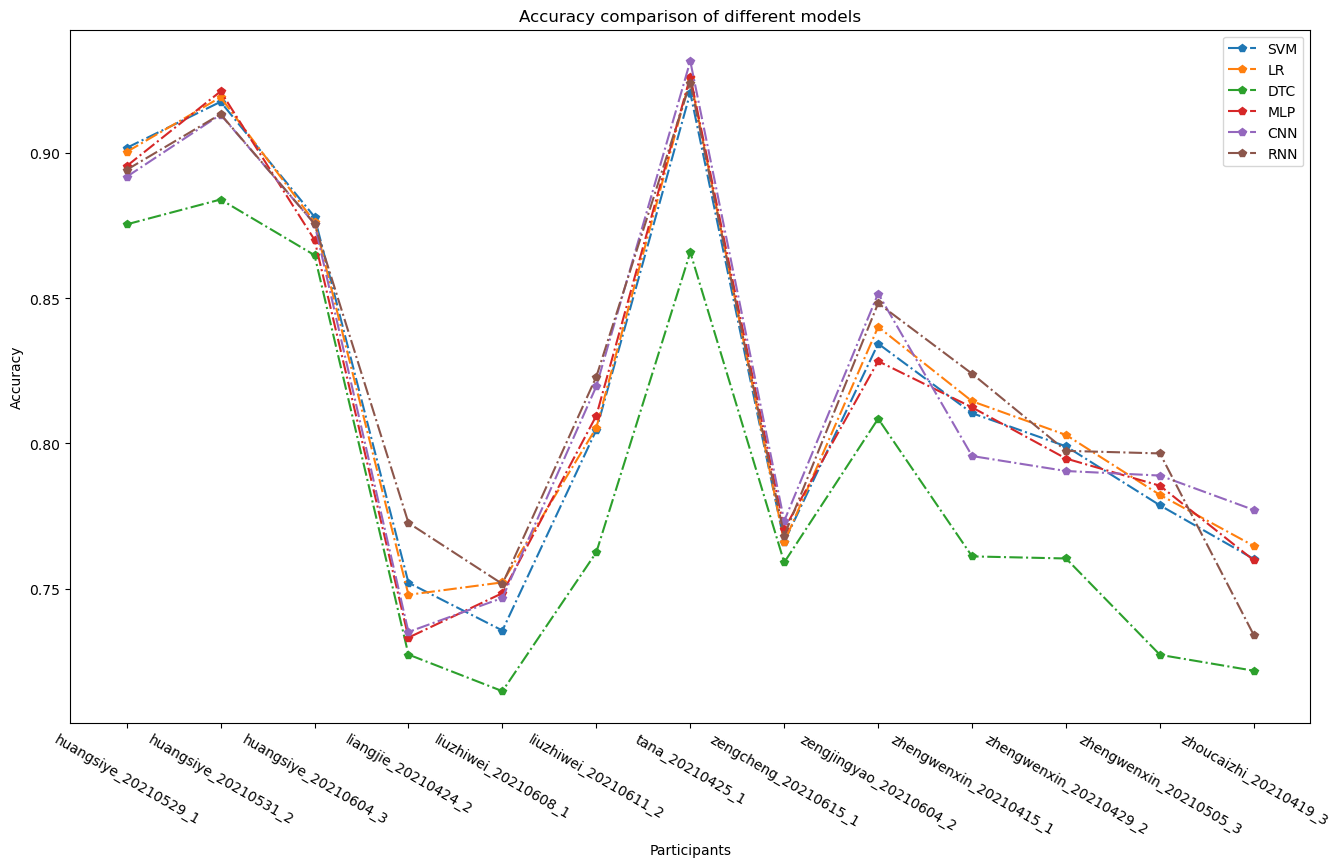

In [26]:
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
plt.title("Accuracy comparison of different models")
x = os.listdir(data_path)
plt.plot(x, acc_tests_SVM, '-.p')
plt.plot(x, acc_tests_LR, '-.p')
plt.plot(x, acc_tests_DTC, '-.p')
plt.plot(x, acc_tests_MLP, '-.p')
plt.plot(x, acc_tests_CNN, '-.p')
plt.plot(x, acc_tests_RNN, '-.p')
plt.legend(['SVM','LR','DTC','MLP','CNN','RNN'])
plt.show()